In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# test数据比train少一列survived

In [8]:
# 将train和test数据合并观察
full_data = train.append(test,ignore_index=True)
display(full_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
# 查看full_data的详细情况
# 注意处理一下异常值
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
# 可以观察到有一些数据存在缺失

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

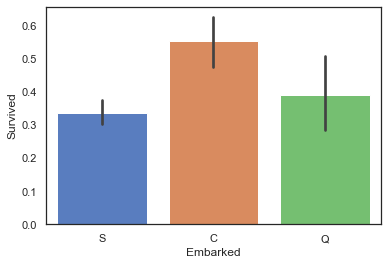

In [12]:
# 绘制登船港口和生存，之间的关系图
sns.barplot(data=train,x='Embarked',y='Survived')

In [13]:
# 计算不同类型Embarked乘客的生存率
s = full_data.groupby('Embarked')['Survived'].value_counts().to_frame() # 所有乘客的数据用Embarked进行分组，分别展示其生存率
display(s)

Survived
Embarked Survived          
C        1.0             93
         0.0             75
Q        0.0             47
         1.0             30
S        0.0            427
         1.0            217

In [14]:
s2 = s/s.sum(level=0) # 计算每个Embarked的生存率和死亡率
display(s2)

Survived
Embarked Survived          
C        1.0       0.553571
         0.0       0.446429
Q        0.0       0.610390
         1.0       0.389610
S        0.0       0.663043
         1.0       0.336957

In [15]:
pd.merge(s,s2,left_index=True,right_index=True,suffixes=['_num','_rate']) # 整体集成展示

Survived_num  Survived_rate
Embarked Survived                             
C        1.0                 93       0.553571
         0.0                 75       0.446429
Q        0.0                 47       0.610390
         1.0                 30       0.389610
S        0.0                427       0.663043
         1.0                217       0.336957

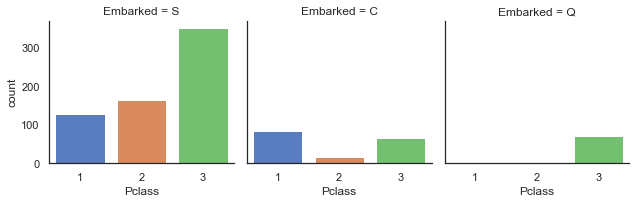

In [16]:
sns.catplot('Pclass',col='Embarked',data=train,kind='count',size=3)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

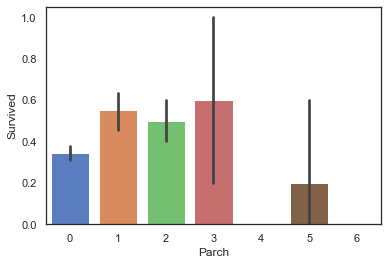

In [17]:
sns.barplot(data=train,x='Parch',y='Survived') # 绘制亲人数量和生存，之间的关系

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

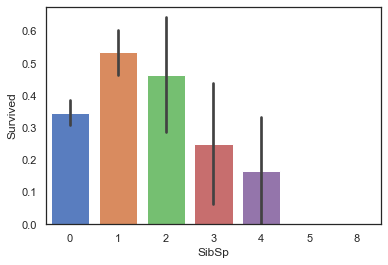

In [18]:
# 兄弟姐妹数量和生存率之间的关系
sns.barplot(data=train,x='SibSp',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

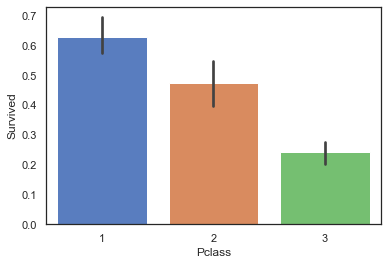

In [19]:
# 舱位等级和生存率之间的关系
sns.barplot(data=train,x='Pclass',y='Survived')

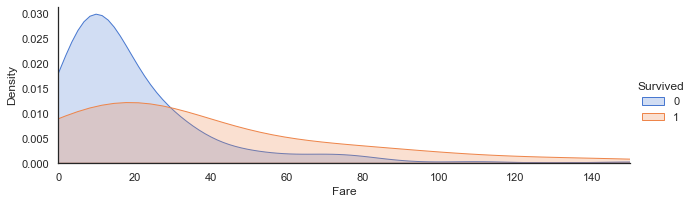

In [20]:
# 消费和生存率之间的关系

# 创建一个 FacetGrid 网格对象，用来绘图。
# aspect是每个图形的横纵比
# hue='Survived'：按 Survived 列分类
ageFacet = sns.FacetGrid(train,hue='Survived',aspect=3) 

# 在 FacetGrid 上映射 sns.kdeplot，对 Fare（票价）这一列画核密度估计图（KDE）。
# 绘制的是概论密度曲线图
ageFacet.map(sns.kdeplot,'Fare',shade=True)

# 设置 X 轴的范围在 0 到 150 之间
ageFacet.set(xlim=(0,150))

# 添加图例
ageFacet.add_legend()

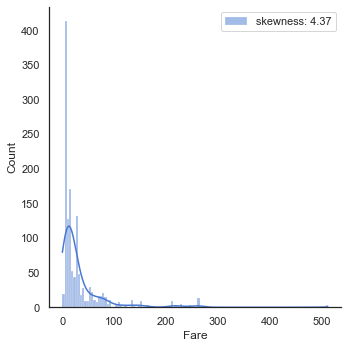

In [21]:
# 查看Fare的分布情况
farePlot = sns.displot(
    full_data['Fare'].dropna(), # 获取票价列并剔除缺失值（NaN）
    kde=True, # 还画一条 核密度估计曲线（KDE），可视化分布形状
    label='skewness: %.2f' % full_data['Fare'].skew() # 计算 Fare 的偏度（skewness），保留两位小数
)
farePlot.ax.legend(loc='best')

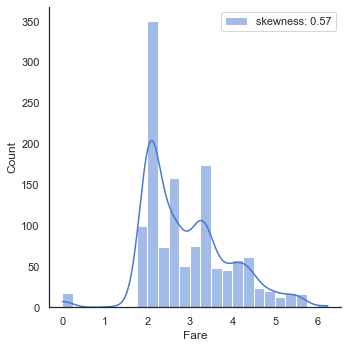

In [22]:
# 对于偏度很大的数据可以使用对数化处理

# 对数化处理Fare值
full_data['Fare'] = full_data['Fare'].map(lambda x : np.log(x) if x > 0 else x)

# 处理之后的Fare分布
farePlot = sns.displot(
    full_data['Fare'].dropna(),
    kde = True,
    label = 'skewness: %.2f' % full_data['Fare'].skew()
)
farePlot.ax.legend(loc='best')

数据预处理

In [23]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [24]:
# 使用Unknown填充缺失的Carbin值

full_data['Cabin'] = full_data['Cabin'].fillna('Unknown')
full_data['Cabin'].head()

0    Unknown
1        C85
2    Unknown
3       C123
4    Unknown
Name: Cabin, dtype: object

In [25]:
display(full_data[full_data['Embarked'].isnull()])
display(full_data['Embarked'].value_counts())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
# 可知在S口岸登船的旅客最多,填充成S
full_data['Embarked'] = full_data['Embarked'].fillna('S')

In [27]:
display(full_data[full_data['Fare'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S


In [28]:
# 利用Pclass，Embarked，Cabin的平均值来填充
price = full_data[
    (full_data['Pclass']==3) &
    (full_data['Embarked']=='S') &
    (full_data['Cabin']=='Unknown')
    ]['Fare'].mean()
full_data['Fare'] = full_data['Fare'].fillna(price)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


特征工程

In [29]:
# 从旅客姓名的头衔中获得其身份

# 创建新特征Title
full_data['Title'] = full_data['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())

# 查看Title的数据分布
full_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [30]:
# 在杂乱的Title中获得6种主要身份

TitleDict = {}
TitleDict['Mr'] = 'Mr'
TitleDict['Miss'] = 'Miss'
TitleDict['Mrs'] = 'Mrs'
TitleDict['Master'] = 'Master'
TitleDict['Rev'] = 'Officer'
TitleDict['Dr'] = 'Officer'
TitleDict['Col'] = 'Officer'
TitleDict['Mlle'] = 'Miss'
TitleDict['Major'] = 'Officer'
TitleDict['Ms'] = 'Mrs'
TitleDict['Lady'] = 'Royalty'
TitleDict['Sir'] = 'Royalty'
TitleDict['Mme'] = 'Mrs'
TitleDict['Don'] = 'Royalty'
TitleDict['Capt'] = 'Officer'
TitleDict['the Countess'] = 'Royalty'
TitleDict['Jonkheer'] = 'Master'
TitleDict['Dona'] = 'Royalty'

full_data['Title'] = full_data['Title'].map(TitleDict)
full_data['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

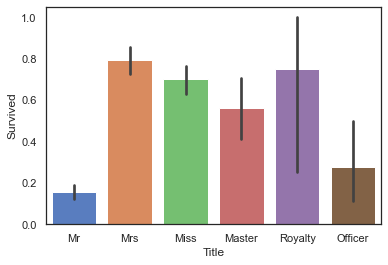

In [31]:
# 可视化Title和Survived之间的关系

sns.barplot(data=full_data,x='Title',y='Survived')

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

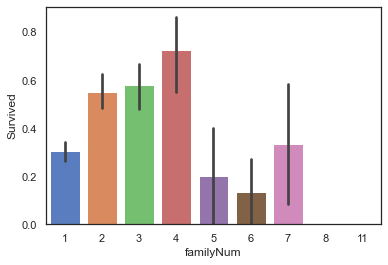

In [32]:
full_data['familyNum'] = full_data['Parch'] + full_data['SibSp'] + 1
sns.barplot(data=full_data,x='familyNum',y='Survived')

In [34]:
# 按照家庭成员多少，将家庭规模分为small，middle，large

def familysize(familyNum):
    if familyNum == 1:
        return 0
    elif (familyNum >= 2) & (familyNum <= 4):
        return 1
    else:
        return 2

full_data['familySize'] = full_data['familyNum'].map(familysize)
full_data['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

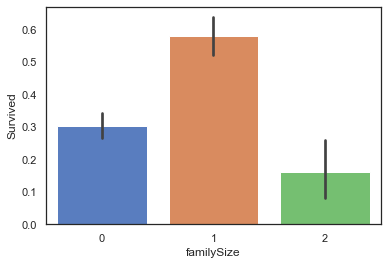

In [35]:
sns.barplot(data=full_data,x='familySize',y='Survived')

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

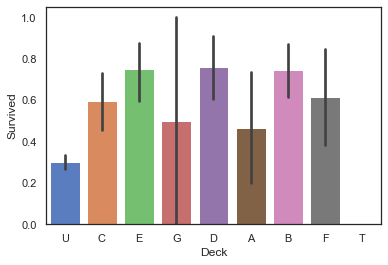

In [36]:
# 提取Cabin字段的首字母，作为Deck字段
full_data['Deck'] = full_data['Cabin'].map(lambda x : x[0])
# 查看不同Deck类型乘客的生存率
sns.barplot(data=full_data,x='Deck',y='Survived')

In [37]:
full_data['Cabin'].unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [41]:
# 查看共号票乘客的数量
TickCountDict = full_data['Ticket'].value_counts()
TickCountDict.head()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: Ticket, dtype: int64

<AxesSubplot:xlabel='TickCom', ylabel='Survived'>

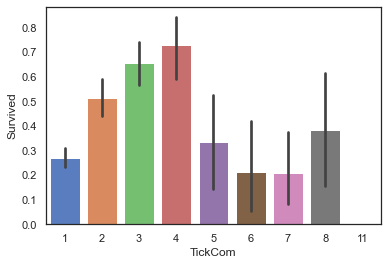

In [42]:
# 将共号乘客数量的数据并入数据集中
full_data['TickCom'] = full_data['Ticket'].map(TickCountDict)
full_data['TickCom'].head()

# 查看TickCom与Survived之间的关系
sns.barplot(data=full_data,x='TickCom',y='Survived')

<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

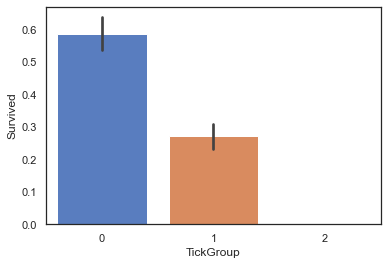

In [44]:
# 和Family相同，将共票者分为三类，便于归纳
def TickCountGroup(num):
    if (num >= 2) & (num <= 4):
        return 0
    elif (num==1) | ((num >= 5) & (num <= 8)):
        return 1
    else:
        return 2

# 得到各位乘客的TickGroup类别
full_data['TickGroup'] = full_data['TickCom'].map(TickCountGroup)
# 查看TickGroup和Survived之间的关系
sns.barplot(data=full_data,x='TickGroup',y='Survived')

In [46]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [47]:
# 可以观察到Age有缺失，需要填充

# 查看Age字段的相关性系数
full_data[full_data['Age'].notnull()].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familyNum,familySize,TickCom,TickGroup
PassengerId,1.000000,0.029340,-0.064097,0.028814,-0.050700,-0.021096,0.038722,-0.044024,-0.048093,-0.013838,-0.005325
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.342920,0.042787,0.106359,0.093239,-0.322862
Pclass,-0.064097,-0.359653,1.000000,-0.408106,0.047221,0.017224,-0.741394,0.039602,-0.074864,-0.114293,0.311226
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.194038,-0.240229,-0.174901,-0.185284,-0.005224
SibSp,-0.050700,-0.017358,0.047221,-0.243699,1.000000,0.374456,0.294004,0.844260,0.779310,0.621362,-0.131130
Parch,-0.021096,0.093317,0.017224,-0.150917,0.374456,1.000000,0.318137,0.813080,0.705738,0.641500,-0.162860
Fare,0.038722,0.342920,-0.741394,0.194038,0.294004,0.318137,1.000000,0.368463,0.451368,0.603769,-0.439788
familyNum,-0.044024,0.042787,0.039602,-0.240229,0.844260,0.813080,0.368463,1.000000,0.897180,0.760887,-0.176458
familySize,-0.048093,0.106359,-0.074864,-0.174901,0.779310,0.705738,0.451368,0.897180,1.000000,0.661291,-0.401090
TickCom,-0.013838,0.093239,-0.114293,-0.185284,0.621362,0.641500,0.603769,0.760887,0.661291,1.000000,-0.203938


In [ ]:
# 将与年龄相关性较小的特征值剔除，或者年龄的特征数据集
agePre = full_data[['Age','Parch','Pclass','SibSp','familyNum','TickCom','Title']]

# 进行one-hot编码
agePre = pd.get_dummies(agePre)
ageCorrDf = agePre.corr()
ageCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCom         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [51]:
agePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,3,1,2,1,0,0,1,0,0,0
1,38.0,0,1,1,2,2,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,0,0
3,35.0,0,1,1,2,2,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,0,0


In [53]:
# 拆分实验集和预测集
ageKnown = agePre[agePre['Age'].notnull()]
ageUnKnown = agePre[agePre['Age'].isnull()]

# 生成实验数据的特征标签
ageKnown_X = ageKnown.drop(['Age'],axis=1)
ageKnown_Y = ageKnown['Age']

# 生成预测数据的特征
ageUnKnown_X = ageUnKnown.drop(['Age'],axis=1)

# 利用随机森林建模
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = None, n_estimators = 500, n_jobs = -1)
rfr.fit(ageKnown_X,ageKnown_Y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [54]:
# 模型得分
score = rfr.score(ageKnown_X,ageKnown_Y)
print(score)

# 预测年龄
ageUnKnown_predict = rfr.predict(ageUnKnown_X)

# 填充预测数据
full_data.loc[full_data['Age'].isnull(),['Age']] = ageUnKnown_predict
full_data.info()

0.5862969696373017
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), obje